In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Kernel Density Estimation

Let $x_n = \{x_1,...,x_N\}$ be independently and identically distributed 1D samples. A kernel density estimation (KDE) with a Gauss kernel can then be used to estimate density $f$ at any given point $x$ and is defined as
\begin{equation}
f(x) = \frac{1}{N} \sum_{n=1}^N \frac{1}{\sqrt{2\pi} h}\exp\bigg(-\frac{(x-x_n )^2}{2h^2}\bigg),
\end{equation}
where $h$ denotes the bandwidth of the kernel.

In [2]:
def kde(x,xi,h):
    f_kde = np.zeros_like(x)
    for i in np.arange(x.shape[0]):
        tmp = (x[i] - xi)/h
        kernel = np.exp(-0.5*tmp**2)/(np.sqrt(2*np.pi)*h)
        f_kde[i] = kernel.sum()/(x.shape[0])
    return f_kde


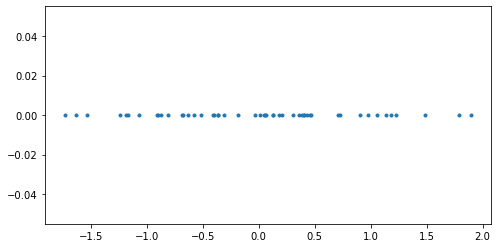

In [4]:
# generate data samples
N = 50
xi = np.random.randn(N).clip(-2.,2.)

plt.figure(figsize=(8,4))
plt.plot(xi,np.zeros_like(xi),'.')
plt.show()

# evaluate kde for each x in the interval [-2,2]
x = np.linspace(-2.,2.,1000)

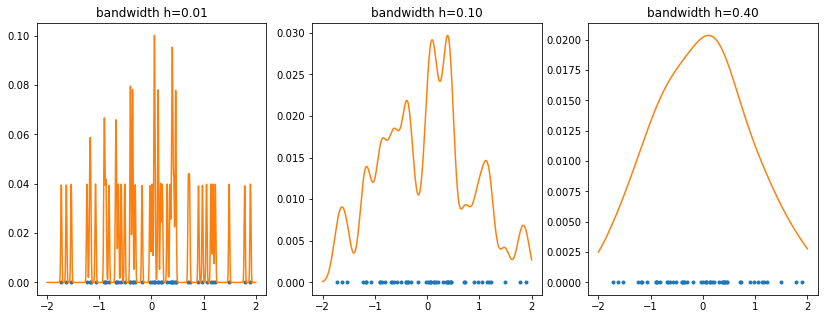

In [13]:
# plot with different bandwidths h
fig, ax = plt.subplots(1,3,figsize=(14,5))
for i,h in enumerate([1e-2,1e-1, 4e-1]):
    ax[i].plot(xi,np.zeros_like(xi),'.')
    ax[i].plot(x,kde(x,xi,h))
    ax[i].set_title('bandwidth h=%.2f' %h)
plt.show()

# LogSumExp Trick

The logsumexp trick is a way to numerically stabilize a computation of type
\begin{equation}
y = \log \sum_i \exp (x_i),
\end{equation}
which can be instable for large values of x (or large negative numbers). 

In [21]:
def logsumexp(x):
    # x: N-dim array
    return np.log(np.sum(np.exp(x)))

In [22]:
# create sample data
N = 20
x = np.random.rand(N)
print(logsumexp(x))

3.5115378603500504


In [23]:
# create sample data with larger values
x = 1e3*np.random.rand(N)
print(logsumexp(x))

inf


/home/lea/anaconda3/envs/mri/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


For numerical stability we can use the following trick
\begin{equation}
y = \log \sum_i \exp (x_i-c) \exp(c) = c +  \sum_i \exp (x_i-c),
\end{equation}
and set $c=\max(x_i)$ to avoid numerical problems.

In [24]:
def logsumexp_stable(x):
    xmax = np.max(x)
    return xmax + np.log(np.sum(np.exp(x-xmax)))

In [25]:
print(logsumexp(x))
print(logsumexp_stable(x))

inf
998.8470065678665


/home/lea/anaconda3/envs/mri/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# create sample data
N = 20
x = np.random.rand(N)
print(logsumexp(x))
print(logsumexp_stable(x))

3.4732999280151233
3.4732999280151233
